## Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:

Variable Name	Description
Carat	 Carat weight of the cubic zirconia.

Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color 	 Colour of the cubic zirconia.With D being the best and J the worst.

Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	 the Price of the cubic zirconia.

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.


1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.


1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?


1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.


1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.


In [2]:
# Importing os to set the path
import os

# Import numpy, to perform Arithmetic operations
import numpy as np

# Import pandas to work on dataframes.
import pandas as pd

# 
import scipy.stats as stats

# Pallete for graphs and plots
import matplotlib.pyplot as plt

# To plot diffrent plots
import seaborn as sns

# Import Linear regression from Linear model from sklearn
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [3]:
# get current working Directory
os.getcwd()

'C:\\Users\\612598'

In [4]:
# change directory 
os.chdir("C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Predictive Modelling Assignment")

In [5]:
# Read the dataset
df=pd.read_csv("cubic_zirconia.csv")

In [6]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [8]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


By above Information we can say that there are 9 dependent Variables and 1 Independent variable which is Price.
Unnamaed is of no use, we will drop it ahead.
Data Type of Variables is int,float and object. 
Cut, Color and clarity are three categorical variables, which we have to convert into numerical variables.
All these three variables are Ordinal categorical variables, where Order matters.
Total we have 26967 rows and 11 columns.

In [10]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


From above table, we can see that mean and meadian are almost same. we will check further whether variables are normally distributed or not.

In [11]:
# Check the missing values
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

Here in Depth column total 697 values are missing out of 26967, so it is less that 3 percent so we can directly drop this observations or we can impute it with Median.

In [12]:
data_df=df.copy()

In [13]:
data_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [14]:
# Dropping the id column
data_df=data_df.drop('Unnamed: 0',axis =1)

In [15]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [16]:
# data_df=data_df.dropna()

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


We have dropped column Unnamed, which has no significance.

In [18]:
## Checking the unique values for categorical variables
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




All the three variables needs to be encoded, as variables are Ordinal we can use One hot encoding or Label encoding.

Now we will perform Univariate analysis, to see the Distributions, skewness and get general idea of data distribution.

Lets plot the graph for carat variable

Text(0.5, 1.0, 'carat_boxplot')

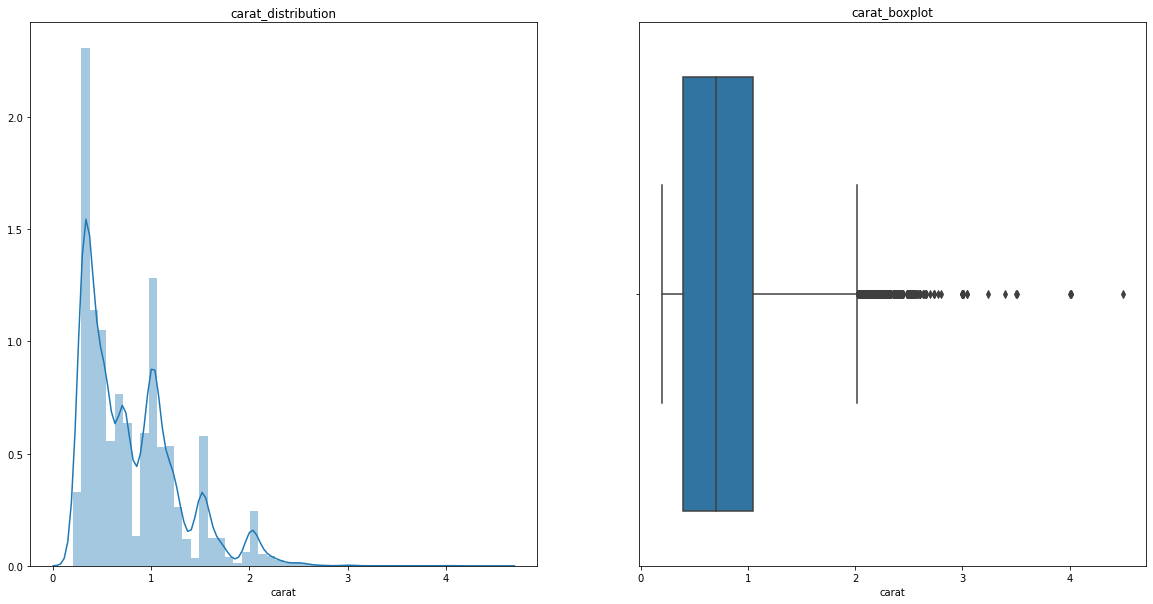

In [19]:
# plot the graph for carat variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('carat_distribution')
sns.distplot(data_df['carat'])

plt.subplot(1,2,2)
sns.boxplot(data_df['carat'])
plt.title('carat_boxplot')

From above plots we get to know that carat variable is right skewed, and it has too many peaks so this variable seems to be inconsistent,
and it has outliers that can be seen in boxplot.Maximum Data points ranges between 0 to 2.

Text(0.5, 1.0, 'depth_boxplot')

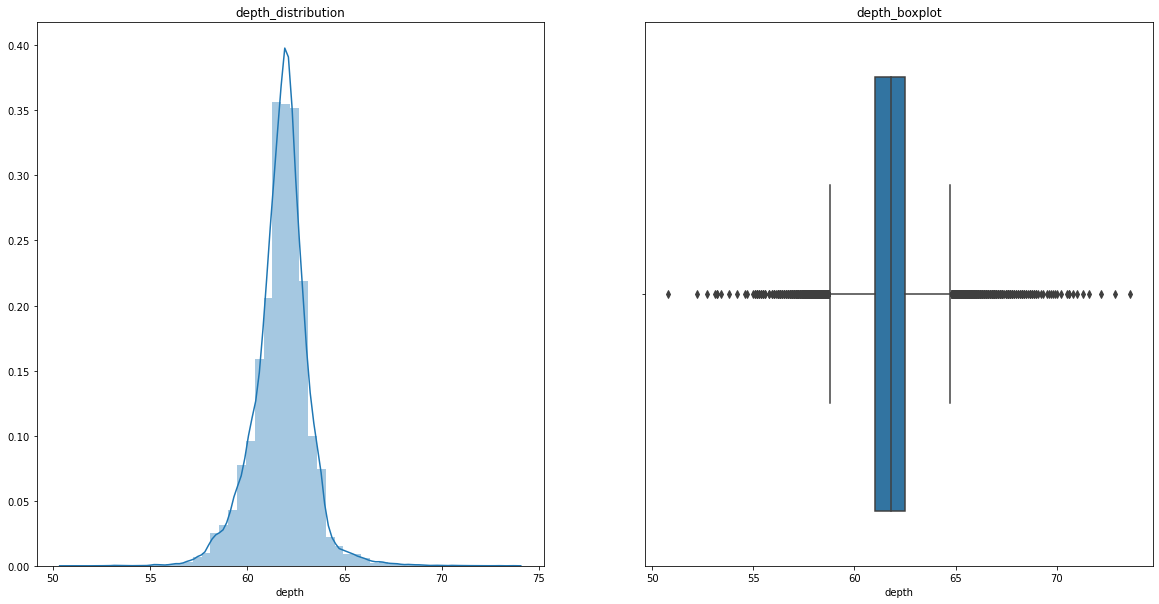

In [20]:
# plot the graph for depth variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('depth_distribution')
sns.distplot(data_df['depth'])

plt.subplot(1,2,2)
sns.boxplot(data_df['depth'])
plt.title('depth_boxplot')

The Distribution of Depth variable seems to be Normal, it is normally distributed. It has too many outliers that can be seen in boxplot.Maximum data points are between 57 to 65.

In [21]:
column= ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

Text(0.5, 1.0, 'table_boxplot')

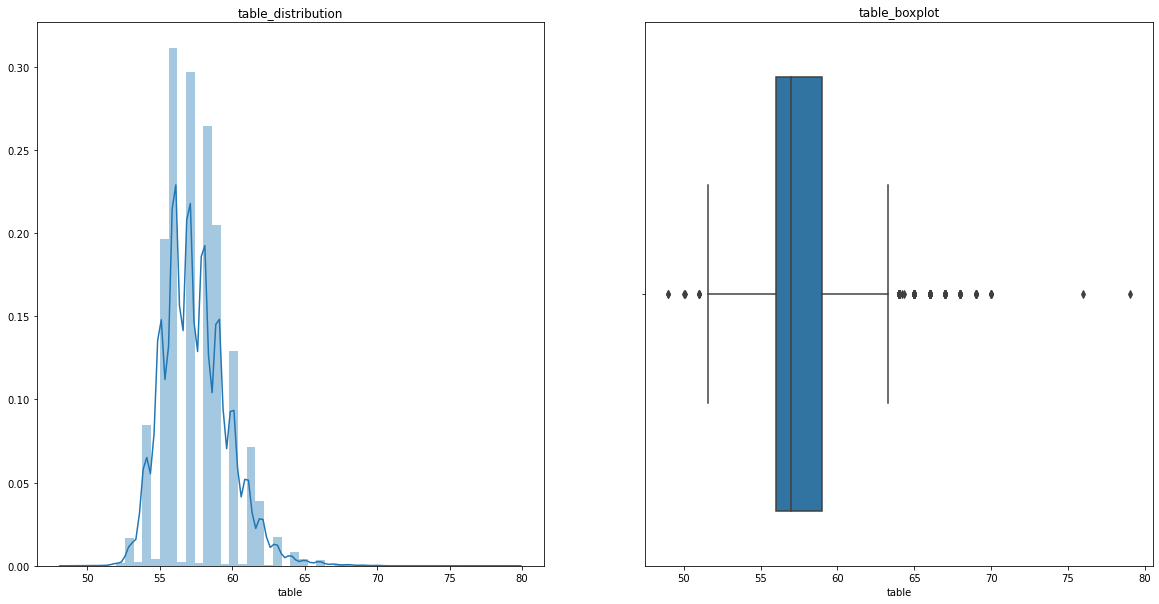

In [22]:
# plot the graph for table variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('table_distribution')
sns.distplot(data_df['table'])

plt.subplot(1,2,2)
sns.boxplot(data_df['table'])
plt.title('table_boxplot')

The Distribution of table variable seems to be right skewd and it has too many spikes due to inconsistent data.It also has outliers that can be seen in boxplot.Maximum data points are situated between 52 to 60. It has range of 50 to 65.

Text(0.5, 1.0, 'x_boxplot')

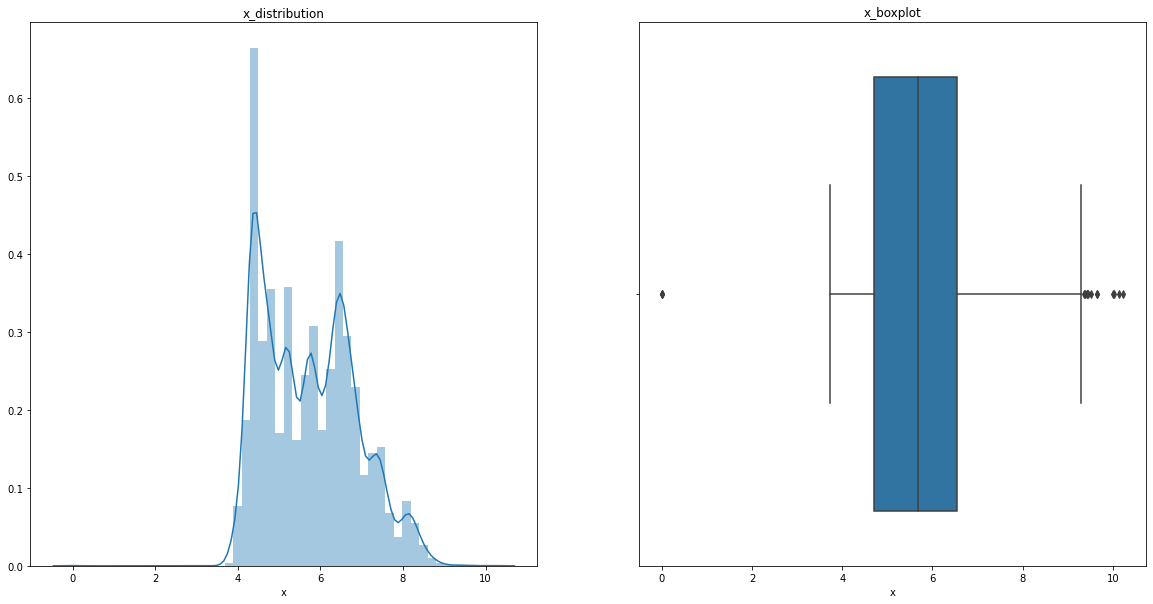

In [23]:
# plot the graph for x variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('x_distribution')
sns.distplot(data_df['x'])

plt.subplot(1,2,2)
sns.boxplot(data_df['x'])
plt.title('x_boxplot')

The Distribution of x variable seems to be left skewd and it has too many spikes due to inconsistent data.It also has outliers that can be seen in boxplot. It has range from 4 to 8.

Text(0.5, 1.0, 'y_boxplot')

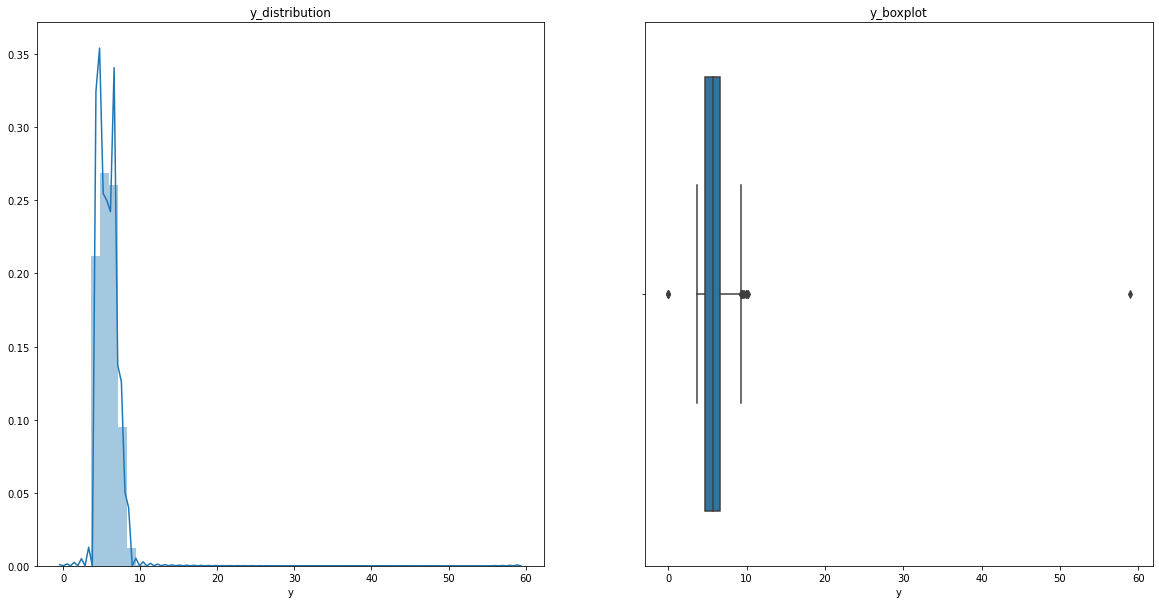

In [24]:
# plot the graph for y variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('y_distribution')
sns.distplot(data_df['y'])

plt.subplot(1,2,2)
sns.boxplot(data_df['y'])
plt.title('y_boxplot')

The Distribution of y variable seems to be right skewd and it has too many spikes due to inconsistent data.It also has less outliers that can be seen in boxplot.

Text(0.5, 1.0, 'z_boxplot')

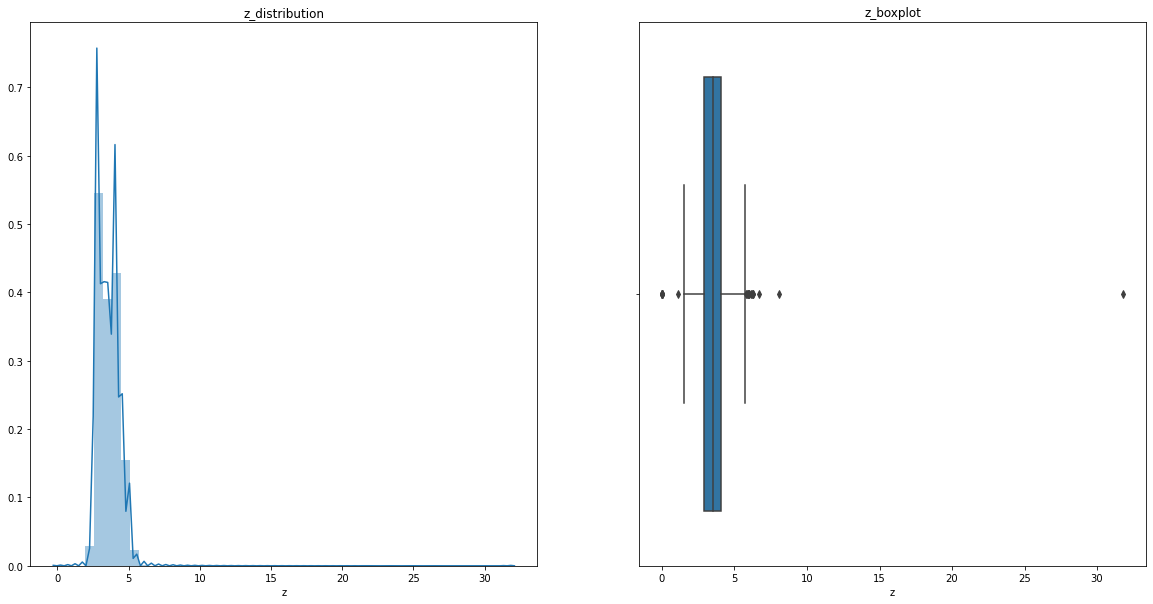

In [25]:
# plot the graph for z variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('z_distribution')
sns.distplot(data_df['z'])

plt.subplot(1,2,2)
sns.boxplot(data_df['z'])
plt.title('z_boxplot')

The Distribution of z variable seems to be right skewd and it has too many spikes due to inconsistent data.It also has less outliers that can be seen in boxplot.

Text(0.5, 1.0, 'price_boxplot')

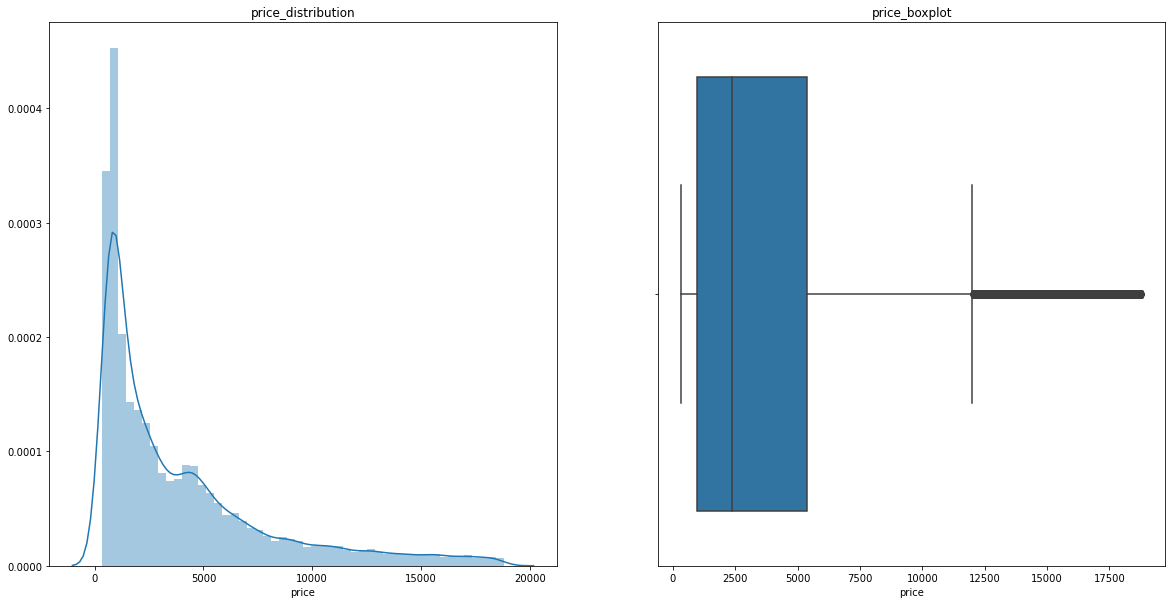

In [26]:
# plot the graph for price variable- Target variable(Dependent)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('price_distribution')
sns.distplot(data_df['price'])

plt.subplot(1,2,2)
sns.boxplot(data_df['price'])
plt.title('price_boxplot')

The target Dependent 'Price' variable is also Right Skewed and it also has outliers.This is just for information, we will not treat this variable.

Skewness

In [27]:
data_df.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

We can see that depth, table, x are less skwed(Positive/Negative) while carat,y ,z are highly positive skwed .

Bivariate Analysis

cut vs price

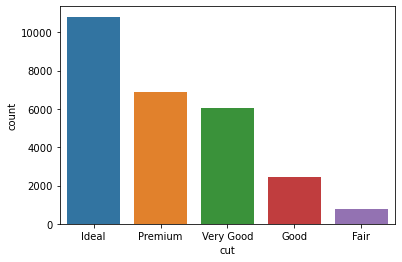

In [28]:
sns.countplot(data_df['cut'])

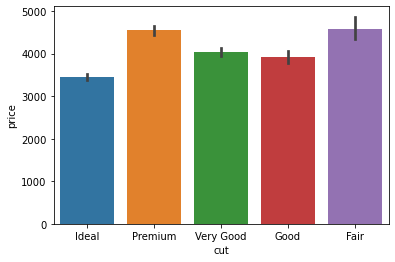

In [29]:
sns.barplot(data_df['cut'],data_df['price'])

We can see, from given dataset count of Ideal cut is High, so it seems that people prefer this cut, the reason seems to be less price.

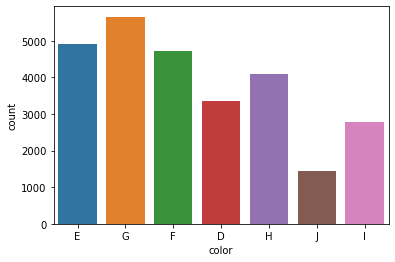

In [30]:
sns.countplot(data_df['color'])

D is the best color while J is the worst color.J us the least used might because of it is worst. Count of users of Color G is high, It is Moderate level color, with the moderate price.

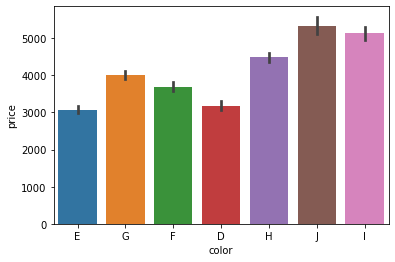

In [31]:
sns.barplot(data_df['color'],data_df['price'])

Another reason that less people select J color may be its Highest price, so Price and its color quality are two factors deciding the count here.

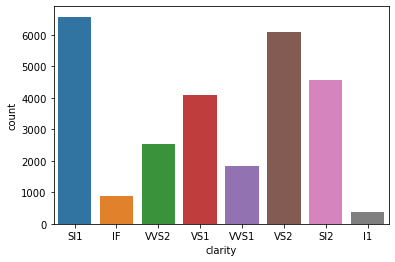

In [32]:
sns.countplot(data_df['clarity'])

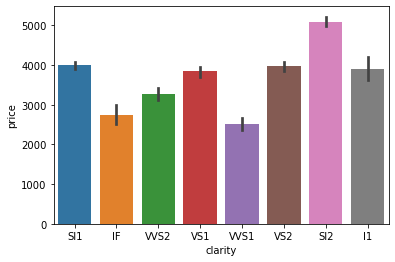

In [33]:
sns.barplot(data_df['clarity'],data_df['price'])

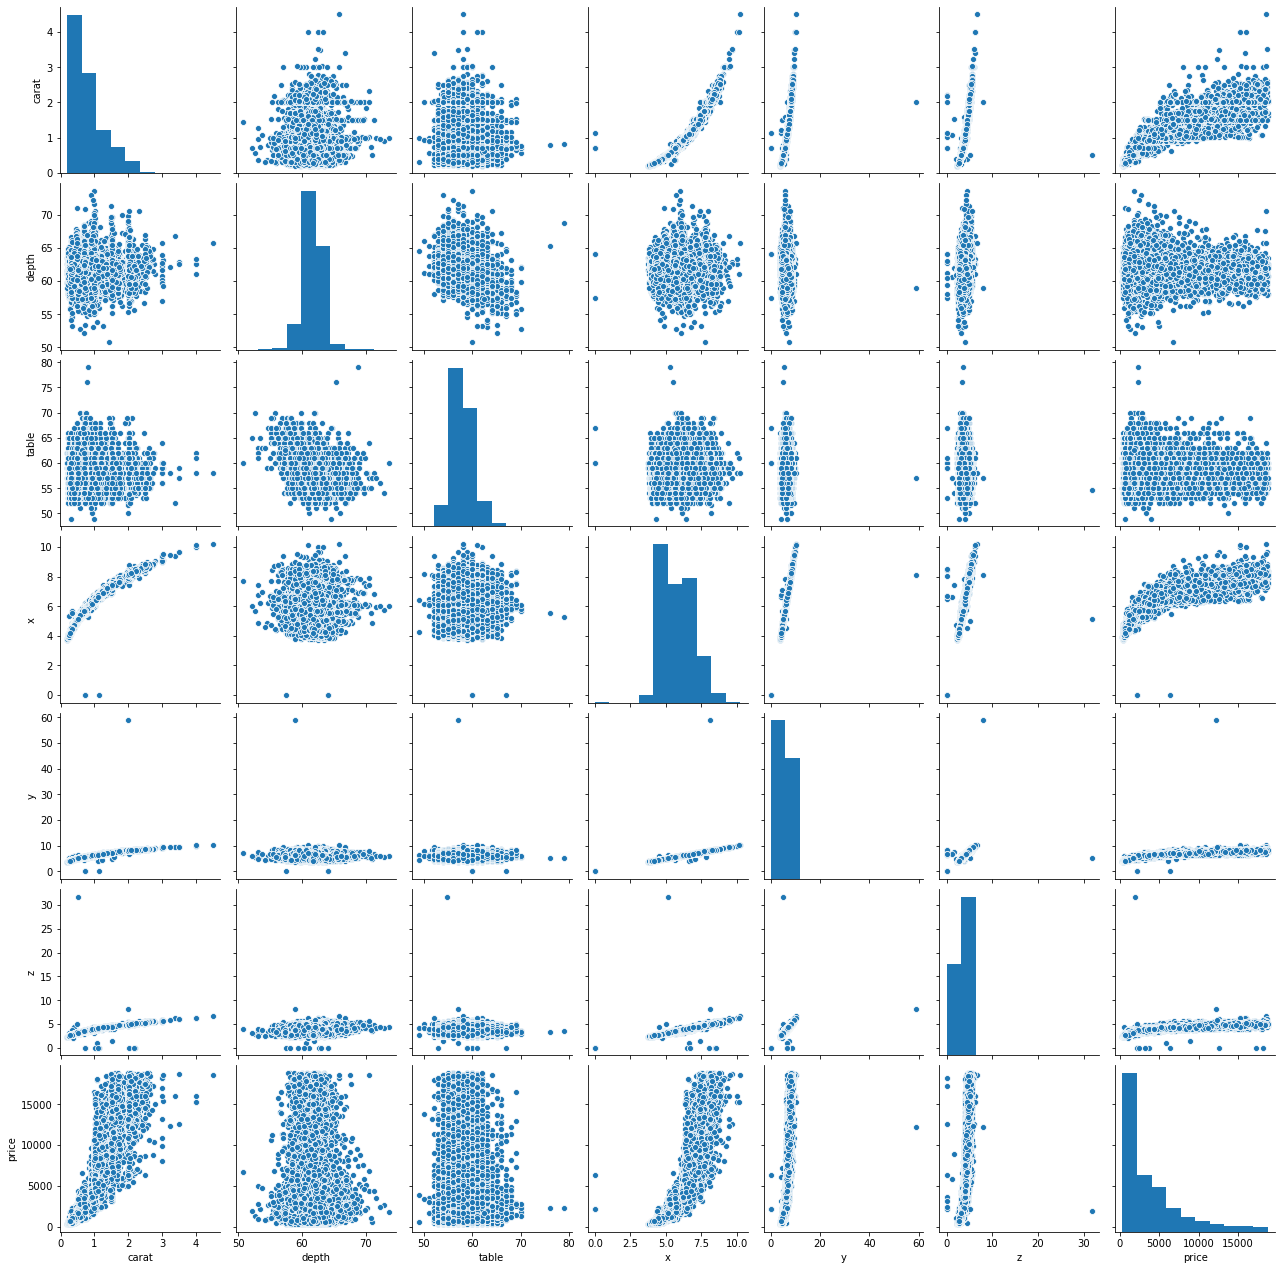

In [34]:
sns.pairplot(data_df)

Order from best to worst:  FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3  : Flawless to Level 3

It seems that no one is buying Flawless diamonds,Level 2 and Level 3 diamonds, so production should be minimised. It means People are not much intersted in diamonds with Best and Worst Clarity. It seems that Diamonds with Clarity SI2,SI1,VS2 can bring Maximum profit.

color vs price

clarity vs Price

In [35]:
data_df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


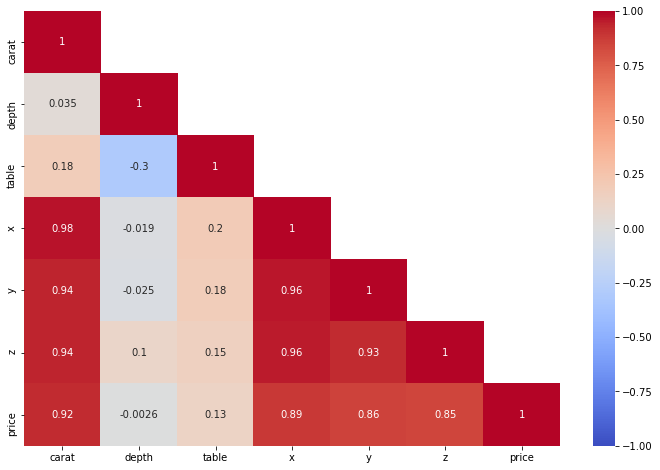

In [36]:
## Checking on the correlation between the variables
Cor=data_df.iloc[:,0:11].corr(method='pearson')
plt.figure(figsize=(12 ,8))
mask = np.array(Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

Missing value treatment

In [37]:
data_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are 697 missing values in depth variable, which is less than 3 % of whole dataset, so we can drop it. but here we will impute it with Median.

In [38]:
## Imputing missing values with Median
for columns in data_df.columns:
    if data_df[columns].dtype != 'object':
        median = data_df[columns].median()
        data_df[columns] = data_df[columns].fillna(median)    
        
data_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [39]:
## Checking for duplicates
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


Here we will drop the 34 Duplicate values, rows count will be 26933 from 26967.

In [40]:
data_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [42]:
data_df.loc[(data_df!=0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [43]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [44]:
new_df = data_df[data_df.loc[:]!=0].dropna()

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [46]:
new_df.astype(bool).sum(axis=0)

carat      26925
cut        26925
color      26925
clarity    26925
depth      26925
table      26925
x          26925
y          26925
z          26925
price      26925
dtype: int64

In [47]:
new_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

All zeros are removed now, dataset now needs a treatment of Label Encoding. Here Linear regression understands Numeric values, so we have to encode this Ordinal Categorical variables with Label Encoding.

## Label Encoding

In [48]:
cleanup_nums = {"cut": {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5 },
                "color": {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J":1 },
                    "clarity": {"FL": 11, "IF": 10, "VVS1": 9, "VVS2": 8, "VS1": 7, "VS2": 6, "SI1":5, "SI2":4,
                                "I1":3 , "I2":2, "I3" : 1}      
               }

In [49]:
new_df =new_df.replace(cleanup_nums)
new_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779


In [50]:
new_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [51]:
new_df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [52]:
new_df["color"] = new_df["color"].astype(str).astype(float)
print(new_df.dtypes)

carat      float64
cut          int64
color      float64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


Now We have done Label Encoding and change the data type to Numeric value.
Lets check for Multicollinearity by VIF.

### Multicollinearity before Scaling

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
X = new_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

import statsmodels.formula.api as smf
def vif_cal(input_data):
  x_vars = input_data
  xvars_names = input_data.columns
  for i in range(0,xvars_names.shape[0]):
    y=x_vars[xvars_names[i]]
    x=x_vars[xvars_names.drop(xvars_names[i])]
    rsq = smf.ols(formula ="y~x", data =x_vars).fit().rsquared
    vif = round(1/(1-rsq),2)
    print(xvars_names[i], "VIF = ", vif)

In [55]:
print(vif)

  Variables          VIF
0     carat    82.430407
1       cut    15.060176
2     color     8.521963
3   clarity    17.285390
4     depth   572.340303
5     table   548.009356
6         x  1135.448138
7         y   347.915077
8         z   386.945129


Scaling is necessary here and all variables are measured in diffrent units and scale. VIF is very high for each variable, so we will do scaling to reduce VIF and Multicollinearity issue.

### Outlier Treatment

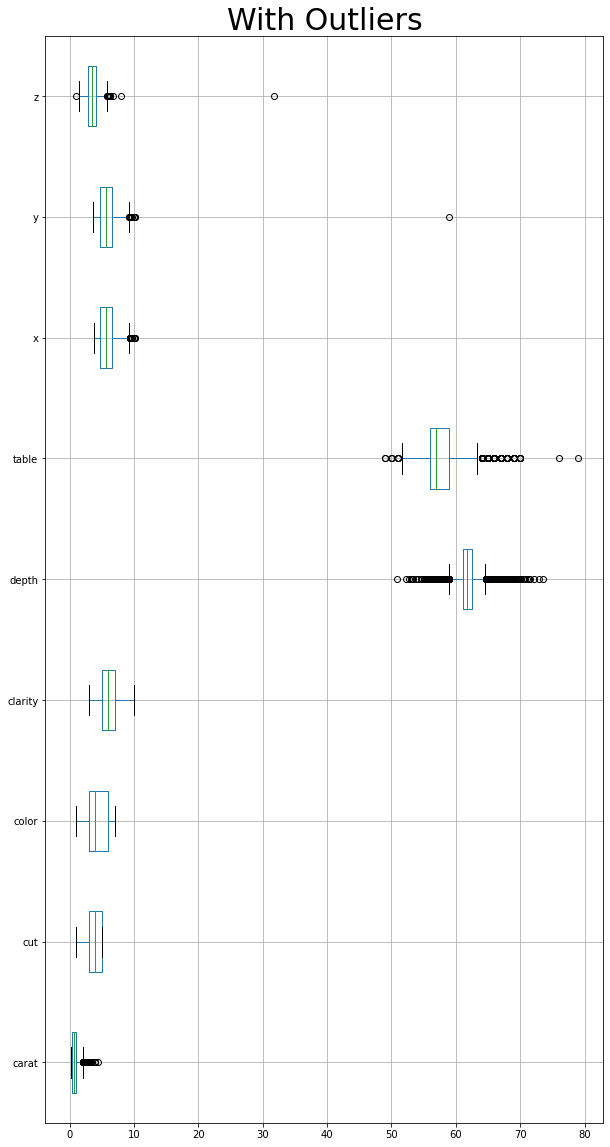

In [56]:
## Check for Outliers
# construct box plot for continuous variables
cont=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
plt.figure(figsize=(10,20))
new_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=30)
plt.show()


In [57]:
# Treat Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in new_df[cont].columns:
    lr,ur=remove_outlier(new_df[column])
    new_df[column]=np.where(new_df[column]>ur,ur,new_df[column])
    new_df[column]=np.where(new_df[column]<lr,lr,new_df[column])

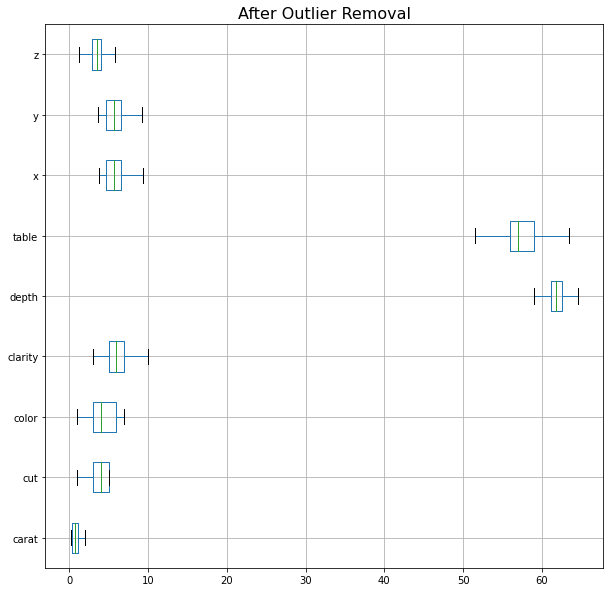

In [59]:
plt.figure(figsize=(10,10))
new_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [60]:
X = new_df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

import statsmodels.formula.api as smf
def vif_cal(input_data):
  x_vars = input_data
  xvars_names = input_data.columns
  for i in range(0,xvars_names.shape[0]):
    y=x_vars[xvars_names[i]]
    x=x_vars[xvars_names.drop(xvars_names[i])]
    rsq = smf.ols(formula ="y~x", data =x_vars).fit().rsquared
    vif = round(1/(1-rsq),2)
    print(xvars_names[i], "VIF = ", vif)

In [61]:
print(vif)

  Variables           VIF
0     carat    122.818152
1       cut     17.456873
2     color      8.532840
3   clarity     17.789725
4     depth   1265.968423
5     table    870.786465
6         x  10679.137653
7         y   9444.231723
8         z   3350.976892


### Scaling

Scaling can be useful to reduce multi collinearity in the data.If VIF is very high scaling will help to reduce VIF, and it reduces Multicollinearity.Scaling does not Increase score of Model or determine Intercept or Coefficents.

In [62]:
# we need to Scale the Train data before feeding to model
from scipy.stats import zscore
df_scaled=new_df.apply(zscore)
# df_scaled.head()

In [63]:
# VIF after Scaling

X = df_scaled[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

import statsmodels.formula.api as smf
def vif_cal(input_data):
  x_vars = input_data
  xvars_names = input_data.columns
  for i in range(0,xvars_names.shape[0]):
    y=x_vars[xvars_names[i]]
    x=x_vars[xvars_names.drop(xvars_names[i])]
    rsq = smf.ols(formula ="y~x", data =x_vars).fit().rsquared
    vif = round(1/(1-rsq),2)
    print(xvars_names[i], "VIF = ", vif)

In [64]:
print(vif)

  Variables         VIF
0     carat   32.891284
1       cut    1.509590
2     color    1.119859
3   clarity    1.241452
4     depth    4.453927
5     table    1.618348
6         x  417.370935
7         y  398.581660
8         z  234.837061


VIF is reduced for below Variables:

cut      1.509590

color    1.119859

clarity  1.241452

depth    4.453927

table    1.618348

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

We have encoded the Data above, We have used Label Encoding here as variables are having Order. One hot encoding will induce Multicollinearity issue,so we will use label encoding.

In [65]:
# Copy all the predictor variables into X dataframe
X = df_scaled.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df_scaled[['price']]

In [66]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.067382,0.979367,0.940777,-0.640136,0.286766,0.261968,-1.296530,-1.289659,-1.261558
1,-1.002446,0.080980,-0.231548,2.396449,-0.780365,0.261968,-1.163253,-1.137530,-1.204060
2,0.231349,-0.817407,0.940777,1.181815,0.368853,1.189326,0.276134,0.347964,0.348406
3,-0.807636,0.979367,0.354615,0.574498,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318
4,-1.045737,0.979367,0.354615,1.789132,-1.108713,0.725647,-1.225449,-1.164377,-1.275933


In [67]:
y.head()

,price
0,-0.854844
1,-0.734225
2,0.585129
3,-0.709852
4,-0.785208


In [68]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [69]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.5848354721361222
The coefficient for cut is 0.03622562342792246
The coefficient for color is 0.1388880044278488
The coefficient for clarity is 0.19661493210991116
The coefficient for depth is -0.0030406207782351447
The coefficient for table is -0.018031386541294596
The coefficient for x is -0.6922279625228712
The coefficient for y is 0.43107533333328174
The coefficient for z is -0.290561873338311


In [71]:
regression_model.coef_

array([[ 1.58483547,  0.03622562,  0.138888  ,  0.19661493, -0.00304062,
        -0.01803139, -0.69222796,  0.43107533, -0.29056187]])

In [72]:
regression_model.coef_[0]

array([ 1.58483547,  0.03622562,  0.138888  ,  0.19661493, -0.00304062,
       -0.01803139, -0.69222796,  0.43107533, -0.29056187])

In [73]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.7585301438372446e-05


In [74]:
# R square on training data
regression_model.score(X_train, y_train)

0.916608167483708

50% of the variation in the log_price is explained by the predictors (Independent variable) in the model for train set

In [75]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9185108421107453

In [76]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.28785409146593177

In [77]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2875753834755628

Now we will use stats model, to find contribution of variables, then we will drop the variable to improve RMSE and Reduce Multicollinearity issue

### Linear Regression using Stats Model

In [78]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.664259,-1.715794,0.940777,-1.247452,1.271811,-0.665390,0.711505,0.759608,0.880269,0.032020
12108,0.469450,-0.817407,1.526940,-1.247452,1.846420,-0.665390,0.507147,0.580632,0.750897,0.305839
20181,-0.266498,-1.715794,-1.403873,-0.032819,-0.862452,1.838477,-0.114810,-0.081576,-0.183457,-0.554166
4712,-0.071688,-1.715794,-0.231548,-0.640136,-2.257931,2.580364,0.285019,0.213733,-0.097209,-0.370376
2548,0.469450,0.080980,-0.231548,0.574498,0.861376,0.725647,0.569343,0.544837,0.650274,0.666951


In [79]:
## Checking the column names
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [80]:
expr= 'price ~ carat+cut+color+clarity+depth+table+x+y+z'

In [81]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    0.000038
carat        1.584835
cut          0.036226
color        0.138888
clarity      0.196615
depth       -0.003041
table       -0.018031
x           -0.692228
y            0.431075
z           -0.290562
dtype: float64

In [82]:
## Checking the summary of Regression through OLS
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:57:27   Log-Likelihood:                -3272.5
No. Observations:               18847   AIC:                             6565.
Df Residuals:                   18837   BIC:                             6644.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.759e-05      0.002      0.018      0.9

In [83]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

0.08285997797367757

In [84]:
#Root Mean Squared Error - RMSE
RMSE= np.sqrt(mse)
RMSE

0.2878540914659327

In [85]:
print('RMSE Value is :',RMSE)

RMSE Value is : 0.2878540914659327


In [86]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

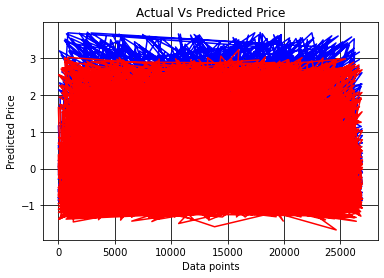

In [87]:
#plt.scatter(y_test['log_price'], y_pred)

plt.figure(figsize=(6,4))
plt.plot(y_test['price'],"blue")
plt.plot(y_pred,"red")
plt.title("Actual Vs Predicted Price")
plt.xlabel ("Data points")
plt.ylabel ("Predicted Price");
plt.grid(True, color ="k")
plt.style.use("fivethirtyeight")

In [88]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.58) * carat + (0.04) * cut + (0.14) * color + (0.2) * clarity + (-0.0) * depth + (-0.02) * table + (-0.69) * x + (0.43) * y + (-0.29) * z + 

Lets Drop the Column Depth as its VIF value is very High, Lets build the Model Again, We will verify whether the Performance is Changing or not.

In [89]:
df_scaled

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,0.979367,0.940777,-0.640136,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.854844
1,-1.002446,0.080980,-0.231548,2.396449,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.734225
2,0.231349,-0.817407,0.940777,1.181815,0.368853,1.189326,0.276134,0.347964,0.348406,0.585129
3,-0.807636,0.979367,0.354615,0.574498,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.709852
4,-1.045737,0.979367,0.354615,1.789132,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.785208
...,...,...,...,...,...,...,...,...,...,...
26962,0.685905,0.080980,-0.231548,-0.640136,0.450940,0.261968,0.782585,0.705915,0.794021,0.366024
26963,-1.002446,0.979367,-0.817710,2.396449,0.122592,-1.129070,-1.145483,-1.173325,-1.146561,-0.701894
26964,-0.612826,0.080980,0.940777,-0.032819,-0.041582,0.261968,-0.541296,-0.520066,-0.528450,-0.567098
26965,-1.132319,-0.817407,0.354615,1.181815,0.040505,-0.665390,-1.367611,-1.370198,-1.347806,-0.809332


In [90]:
df2=df_scaled.drop('depth',axis=1)

In [91]:
df2.head()

,carat,cut,color,clarity,table,x,y,z,price
0,-1.067382,0.979367,0.940777,-0.640136,0.261968,-1.296530,-1.289659,-1.261558,-0.854844
1,-1.002446,0.080980,-0.231548,2.396449,0.261968,-1.163253,-1.137530,-1.204060,-0.734225
2,0.231349,-0.817407,0.940777,1.181815,1.189326,0.276134,0.347964,0.348406,0.585129
3,-0.807636,0.979367,0.354615,0.574498,-0.665390,-0.807849,-0.833272,-0.830318,-0.709852
4,-1.045737,0.979367,0.354615,1.789132,0.725647,-1.225449,-1.164377,-1.275933,-0.785208


In [92]:
# Copy all the predictor variables into X dataframe
X = df2.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df2[['price']]

In [93]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [94]:
# concatenate X and y into a single dataframe -  Adding dependent and independent variable
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,table,x,y,z,price
5030,0.664259,-1.715794,0.940777,-1.247452,-0.665390,0.711505,0.759608,0.880269,0.032020
12108,0.469450,-0.817407,1.526940,-1.247452,-0.665390,0.507147,0.580632,0.750897,0.305839
20181,-0.266498,-1.715794,-1.403873,-0.032819,1.838477,-0.114810,-0.081576,-0.183457,-0.554166
4712,-0.071688,-1.715794,-0.231548,-0.640136,2.580364,0.285019,0.213733,-0.097209,-0.370376
2548,0.469450,0.080980,-0.231548,0.574498,0.725647,0.569343,0.544837,0.650274,0.666951


In [95]:
## Checking the column names
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [96]:
expr= 'price ~ carat+cut+color+clarity+table+x+y+z'

In [97]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    0.000028
carat        1.584135
cut          0.036634
color        0.138933
clarity      0.196686
table       -0.017585
x           -0.684652
y            0.441751
z           -0.308206
dtype: float64

In [98]:
## Checking the summary of Regression through OLS
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.588e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:57:28   Log-Likelihood:                -3272.8
No. Observations:               18847   AIC:                             6564.
Df Residuals:                   18838   BIC:                             6634.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.76e-05      0.002      0.013      0.9

In [99]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [100]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.28785793230083606